## Index
1. Libraries
2. Data Sets
3. Cleaning and Wrangling
4. Elbow Technique
5. K-means Clustering
6. Descriptive Statistics

## 01. Libraries

In [6]:
# Importing visualization and analytical libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [8]:
# This option ensures the graphs created are displayed automatically.

%matplotlib inline

## 02. Data Sets

In [11]:
# Creating path

path= r'/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design'

In [13]:
# Imprting data set

df_prepared= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'global_food_wastage_prepared.csv'), index_col = False)

## 03. Cleaning and Wrangling

In [16]:
df_prepared.head()

,Unnamed: 0,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,0,Argentina,2018,Bakery Items,72290.69,71749.94,60.3725,528.2025,59.035000
1,1,Argentina,2018,Beverages,127249.21,128791.57,131.8000,525.7825,37.177500
2,2,Argentina,2018,Dairy Products,28971.41,25935.06,94.5000,680.0200,54.286667
3,3,Argentina,2018,Frozen Food,78925.33,87757.40,123.7800,991.5350,62.292500
4,4,Argentina,2018,Grains & Cereals,152731.27,156398.00,122.7050,676.5950,53.573333


In [18]:
# Creating a new data frame and dropping all categorical variables

df_numeric=df_prepared.drop(columns=['Unnamed: 0','Country','Year','Food Category'])

In [20]:
df_numeric.columns.tolist()

['Total Waste (Tons)',
 'Economic Loss (Million $)',
 'Avg Waste per Capita (Kg)',
 'Population (Million)',
 'Household Waste (%)']

## 04. Elbow Technique

In [23]:
# Defining the range of potential clusters and the k-means within that range in the data set

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [25]:
# Creating a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

In [26]:
score

[-7987155768654.748,
 -2699376941268.395,
 -1393082266116.3862,
 -818602037258.4463,
 -568561964664.3002,
 -424927856577.4736,
 -311955488973.14905,
 -239368702492.25708,
 -199474091747.12924]

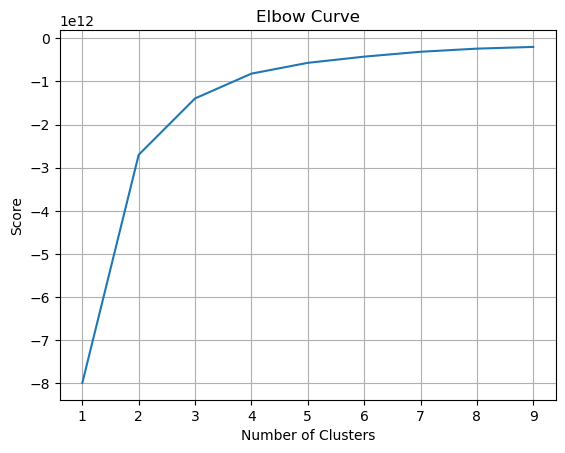

In [29]:
# Now plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.grid(True)
pl.show()

### From the elbow curve above the cluster numbers increase significantly from 1 - 2, and also sharply from 2-3 then continues to increase slightly less from 3-4, where it then evens out after 4. For this reason, the optimal number of clusters is 4. 

## 05. K-means Clustering

In [33]:
# Firstly creating the k-means object with the number of clusters.

kmeans = KMeans(n_clusters = 4) 

In [35]:
# Now fitting the k-means object to the data.

kmeans.fit(df_numeric)

KMeans(n_clusters=4)

In [37]:
# Now applying the algorithm to the dataframe. 

df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

In [39]:
# Checking the added column with the cluster number

df_numeric.head()

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),clusters
0,72290.69,71749.94,60.3725,528.2025,59.035000,0
1,127249.21,128791.57,131.8000,525.7825,37.177500,3
2,28971.41,25935.06,94.5000,680.0200,54.286667,2
3,78925.33,87757.40,123.7800,991.5350,62.292500,0
4,152731.27,156398.00,122.7050,676.5950,53.573333,3


In [41]:
# And checking the observations for each cluster

df_numeric['clusters'].value_counts()

clusters
0    375
3    320
2    280
1    131
Name: count, dtype: int64

### Visualizations: 

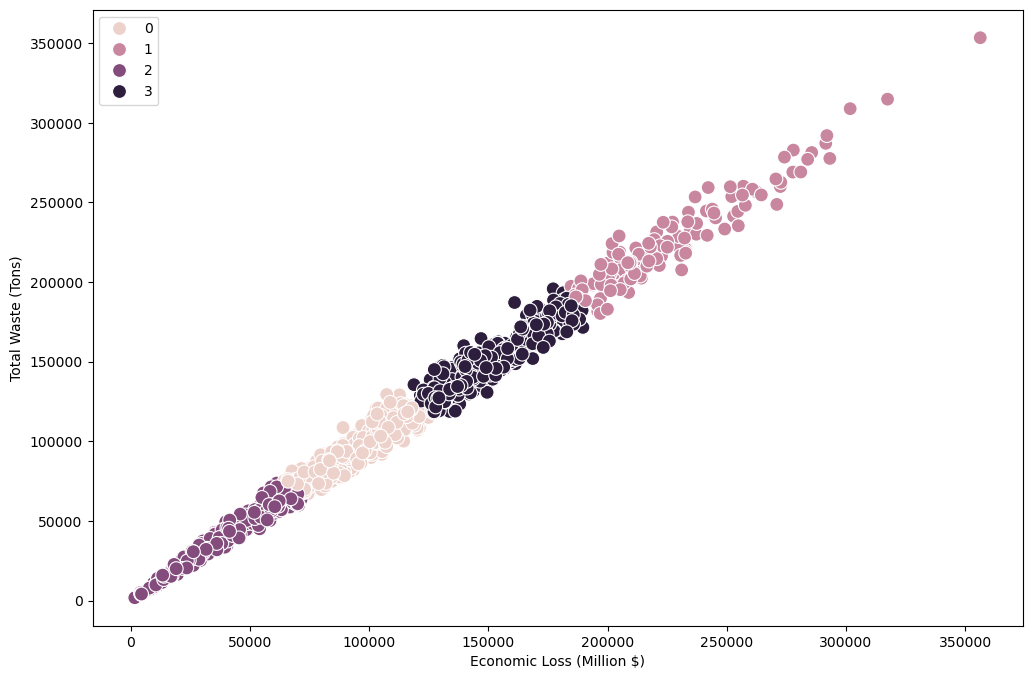

In [44]:
# 1. Cluster plot for the "Total Waste (Tons)" and "Economic loss" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Economic Loss (Million $)'], y=df_numeric['Total Waste (Tons)'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Economic Loss (Million $)')
plt.ylabel('Total Waste (Tons)')
plt.show()

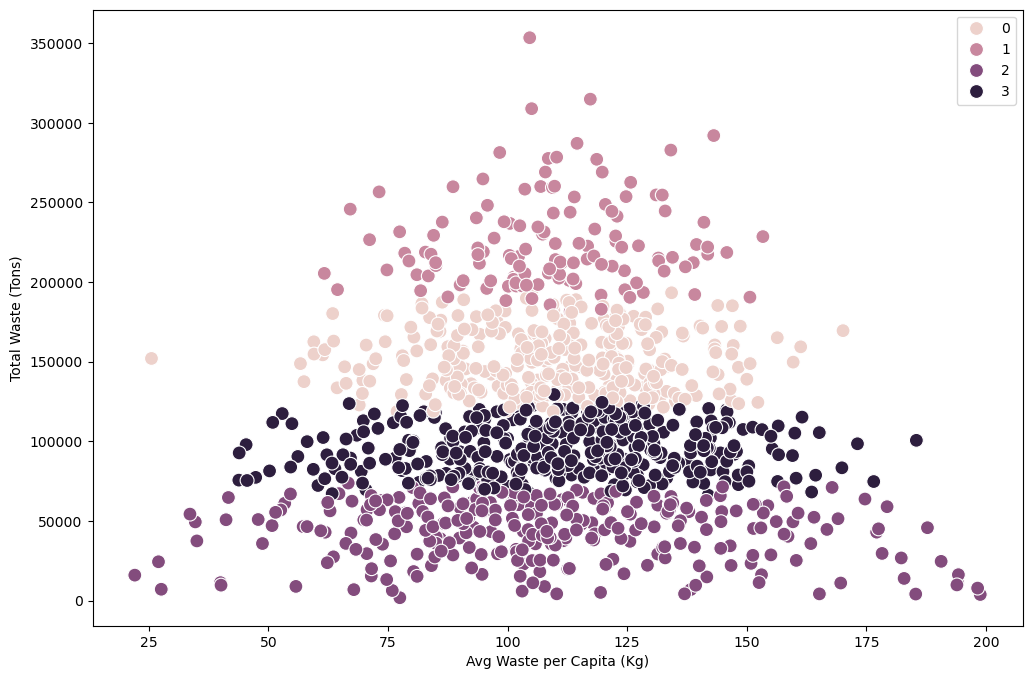

In [59]:
# 1. Cluster plot for the "Total Waste (Tons)" and "Avg Waste per Capita (Kg)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Avg Waste per Capita (Kg)'], y=df_numeric['Total Waste (Tons)'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Avg Waste per Capita (Kg)')
plt.ylabel('Total Waste (Tons)')
plt.show()

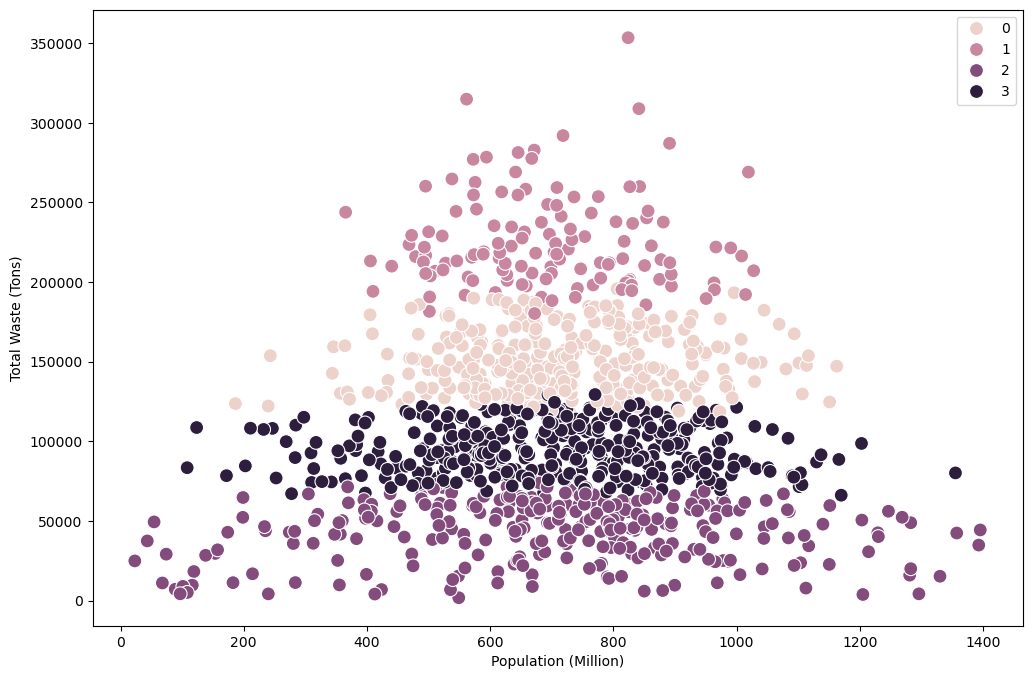

In [61]:
# 2. Cluster plot for the "Total Waste (Tons)" and "Population (Million)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Population (Million)'], y=df_numeric['Total Waste (Tons)'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Population (Million)')
plt.ylabel('Total Waste (Tons)')
plt.show()

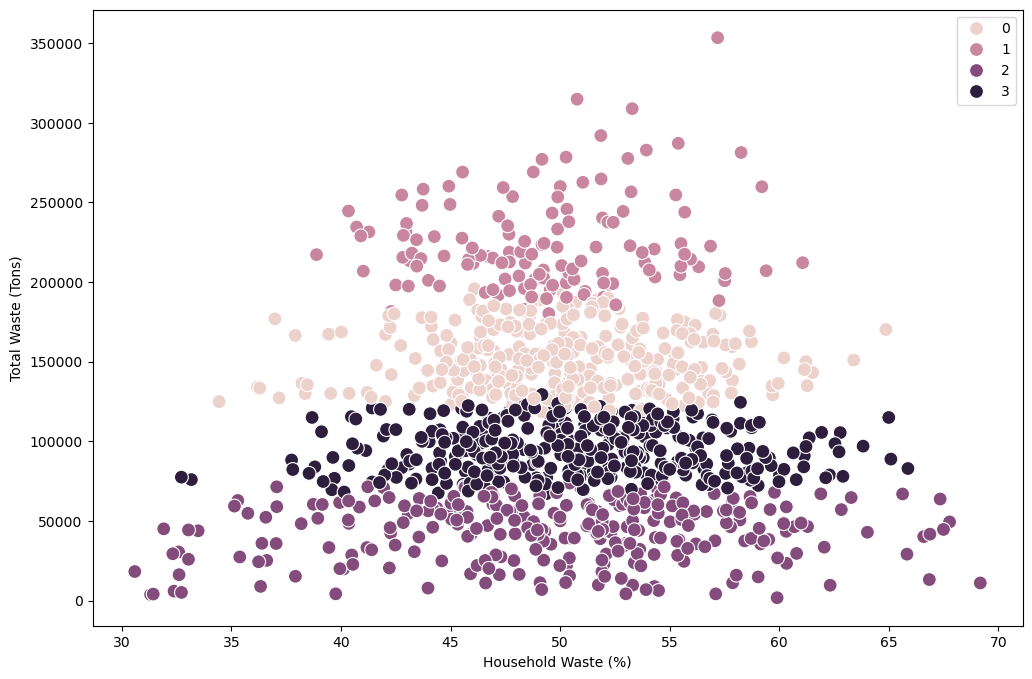

In [63]:
# 3. Cluster plot for the "Total Waste (Tons)" and "Household Waste (%)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Household Waste (%)'], y=df_numeric['Total Waste (Tons)'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Household Waste (%)')
plt.ylabel('Total Waste (Tons)')
plt.show()

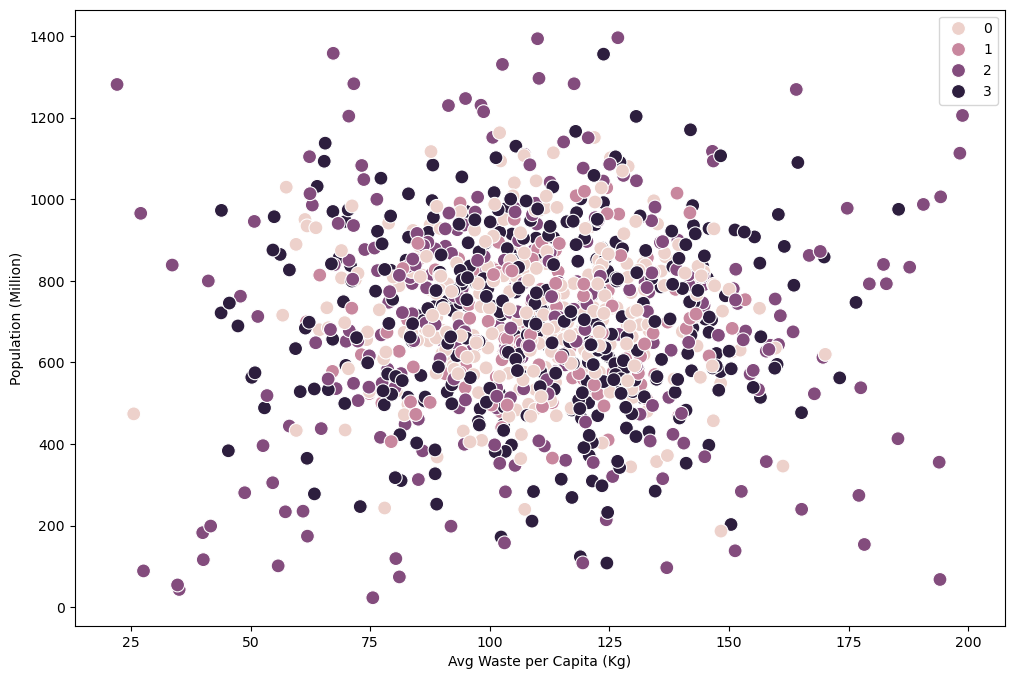

In [65]:
# 4. Cluster plot for the "Population (Million)" and "Avg Waste per Capita (Kg)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Avg Waste per Capita (Kg)'], y=df_numeric['Population (Million)'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Avg Waste per Capita (Kg)')
plt.ylabel('Population (Million)')
plt.show()

## Observations: 
1. Cluster Plot: Total Waste (Tons) vs. Avg. Waste per Capita (Kg)
Clusters 0, 2, and 3 are densely grouped toward the center of the plot, indicating that most countries generate an average waste per capita between 80 and 130 kg, with total waste volumes ranging from 50,000 to 200,000 tons. This suggests a common pattern: countries with moderate per-person waste tend to collectively contribute the majority of total waste.

    Outliers outside these clusters do not show a clear relationship. The clusters are distinct and do not overlap significantly, implying clear segmentation among country profiles.

2. Cluster Plot: Total Waste (Tons) vs. Population (Million)
The densest clusters appear in the mid-range of population size, particularly between 500 to 1,000 million, where countries contribute the highest total waste volumes. This indicates that larger populations tend to produce more waste, but only up to a point.

    Cluster 1 contains some high total waste values, but the relationship becomes less consistent beyond 200,000 tons—likely due to differences in waste generation rates per person. Again, clusters remain well-separated, pointing to distinct population-waste dynamics among different groups of countries.

3. Cluster Plot: Total Waste (Tons) vs. Household Waste (%)
Since household waste % is derived from total waste, the clustering pattern mirrors earlier total waste trends. The majority of countries fall within 45% to 60% household waste, and this range corresponds to total waste values between 200,000 and 250,000 tons, especially in Cluster 1.

    This suggests that countries where households contribute around half of the total waste also tend to generate the highest total waste volumes.
    The clustering again shows minimal overlap, which indicates clear behavioral or structural differences among the groups.

4. Cluster Plot: Population (Million) vs. Avg. Waste per Capita (Kg)
Most clusters are concentrated in the mid-range: populations between 400 and 1,000 million, with average waste per capita between 75 and 150 kg. This indicates that countries with mid-to-large populations tend to have moderate individual waste rates.
Outside of this bubble there is little overlap or density, indicating no trend in average waste compared to population size. 

## 06. Descriptive Statistics

In [80]:
#Assigning a cluster to a colour name:

df_numeric.loc[df_numeric['clusters'] == 3, 'cluster'] = '3 black'
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = '2 purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = '1 pink'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = '0 beige'

In [82]:
# Now aggegating the variables into descriptive statistics split between the 4 clusters: 

df_numeric.groupby('cluster').agg({'Total Waste (Tons)':['mean', 'median'], 
                                   'Economic Loss (Million $)':['mean', 'median'], 
                                   'Avg Waste per Capita (Kg)':['mean', 'median'],
                                   'Population (Million)':['mean', 'median'],        
                                   'Household Waste (%)':['mean', 'median']})

Total Waste (Tons)            Economic Loss (Million $)             \
                       mean     median                      mean     median   
cluster                                                                       
0 beige       150306.374562  148128.53             150787.527156  148342.29   
1 pink        224455.346412  216738.18             225522.525802  217242.34   
2 purple       43550.112536   46424.11              42830.204143   45336.43   
3 black        94968.476293   93519.84              94428.273653   92013.94   

         Avg Waste per Capita (Kg)             Population (Million)  \
                              mean      median                 mean   
cluster                                                               
0 beige                 109.585313  110.366667           717.549058   
1 pink                  109.204082  109.390000           696.806067   
2 purple                108.541957  105.565000           706.519548   
3 black                 110.365629  111.438000           698.015443   

                     Household Waste (%)             
              median                mean     median  
cluster                                              
0 beige   711.756667           49.909209  49.823000  
1 pink    693.333750           49.385612  49.264444  
2 purple  724.270000           49.939192  50.790000  
3 black   700.260000           50.548114  50.396667

## Findings: 

In terms of total food waste, the purple cluster performs the best among the four clusters, showing the lowest levels of food wastage, which also corresponds to the lowest economic loss. Interestingly, when comparing population size, average waste per capita, and household waste, all four clusters appear quite similar—suggesting these variables alone do not explain the purple cluster’s superior performance.

One notable insight is that, despite having the second-largest population, the purple cluster contributes the least to total food waste. In contrast, the pink cluster, which has the smallest population, shows the highest food waste. This suggests that population size is not directly correlated with total food wastage, and other factors—such as waste management systems, GDP or other cultural behaviors may play a more significant role and warrant further investigation.